<a href="https://colab.research.google.com/github/Srivathsa252/College_Management_System/blob/main/CSE4111_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSE411 Computer Vision | LAB 2 | 2022BCD0020 | Srivathsa K |**

## Mount google drive
Mount the user's Google Drive to access the image file.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read an image

In [33]:
import cv2
import matplotlib.pyplot as plt

roll_number = "2022bcd0020"
image_name = "CAT" + roll_number + ".jpg"
image_path = "/content/drive/MyDrive/images/cats/h.jpeg"
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print(f"Image {image_name} loaded successfully.")

Image CAT2022bcd0020.jpg loaded successfully.


## Shape, size, and dtype

### Subtask:
Print the shape, size, and data type of the loaded image.

In [34]:
if img is not None:
    print(f"Image shape: {img.shape}")
    print(f"Image size: {img.size}")
    print(f"Image data type: {img.dtype}")
else:
    print("Image was not loaded successfully, cannot print shape, size, or data type.")

Image shape: (194, 259, 3)
Image size: 150738
Image data type: uint8


## Convert image to grayscale and rgb

### Subtask:
Convert the image to grayscale and ensure the original image is in RGB format for channel extraction and display.

Check if the image is loaded and then convert it to grayscale and RGB.

In [35]:
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Image converted to grayscale and RGB.")
else:
    print("Image was not loaded successfully, cannot perform color conversions.")

Image converted to grayscale and RGB.


## Extract red, green, and blue channels

Extract the individual Red, Green, and Blue color channels from the image.

**Reasoning**:
Extract the individual color channels (Red, Green, and Blue) from the `rgb_img` using OpenCV's splitting function.

In [36]:
if img is not None: # Check if original image was loaded
    # Ensure rgb_img is created even if img is None to avoid NameError later
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img is not None else None

    if rgb_img is not None:
        # Split the image into its channels (OpenCV uses BGR order by default even if the input is RGB)
        # So, for rgb_img, the split order will be R, G, B
        r_channel, g_channel, b_channel = cv2.split(rgb_img)
        print("Image channels extracted (Red, Green, Blue).")
    else:
        print("RGB image was not created successfully, cannot extract channels.")
else:
    print("Original image was not loaded successfully, cannot extract channels.")

Image channels extracted (Red, Green, Blue).


## Display images

Display the original, grayscale, and channel images using both Matplotlib and OpenCV.

Display the original, grayscale, and channel images using Matplotlib and OpenCV as requested by the subtask.

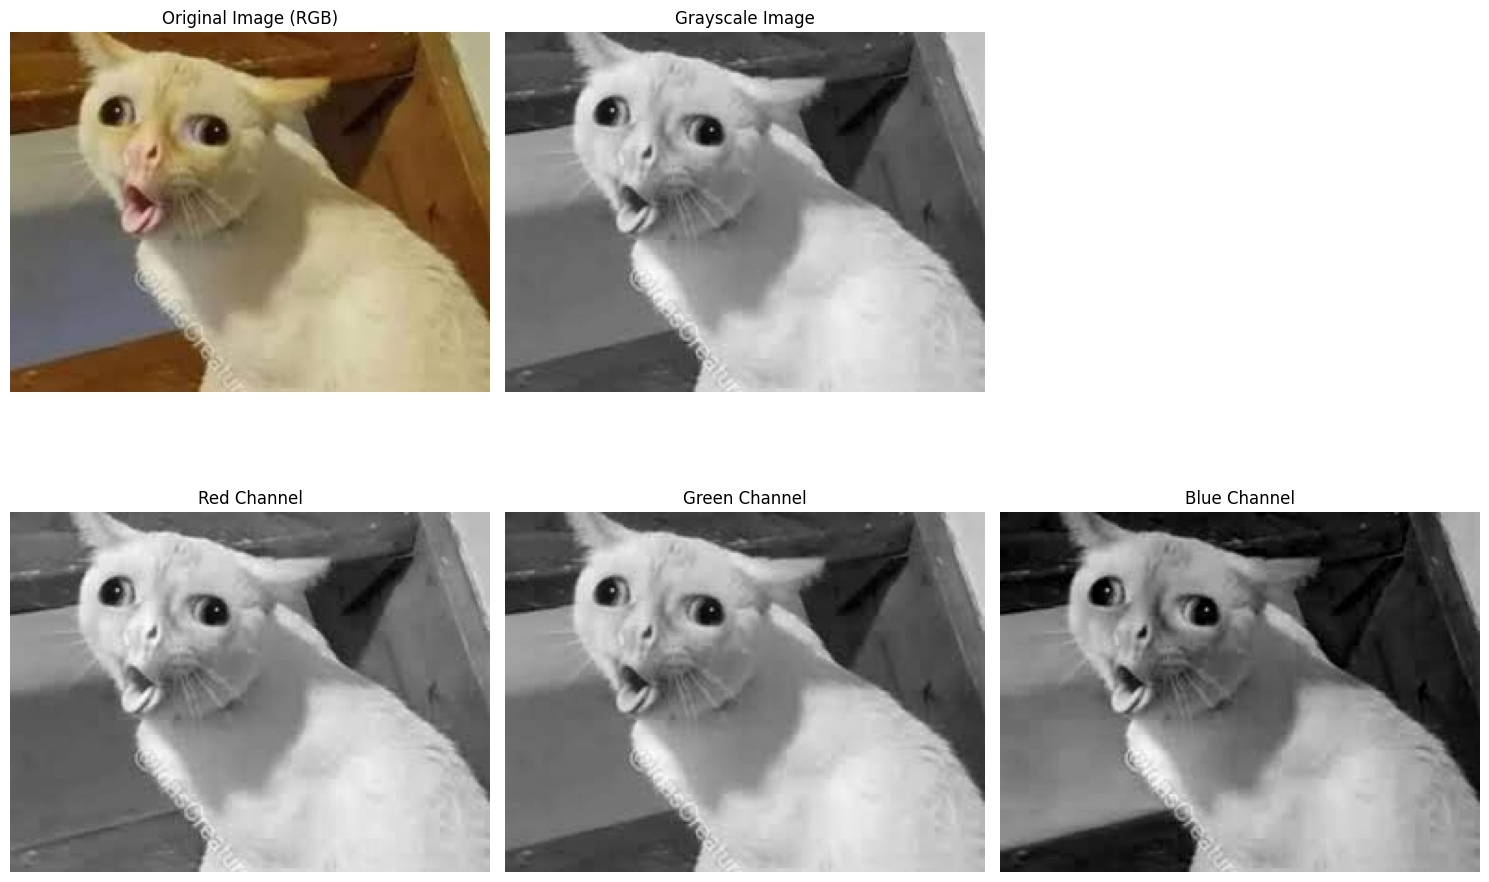

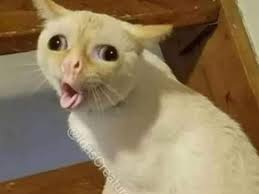

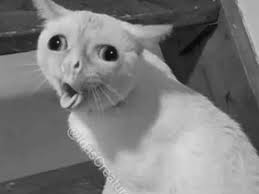

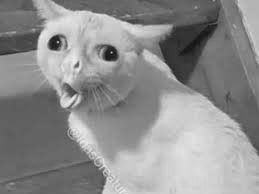

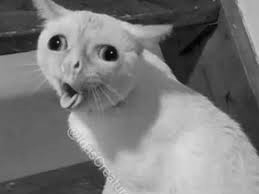

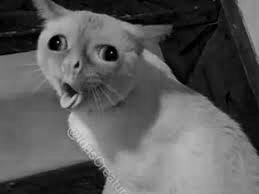

In [37]:
if img is not None:
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Display original as RGB with Matplotlib
    plt.title("Original Image (RGB)")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    # Check if channels were extracted before displaying
    if 'r_channel' in locals() and 'g_channel' in locals() and 'b_channel' in locals():
        plt.subplot(2, 3, 4)
        plt.imshow(r_channel, cmap='gray')
        plt.title("Red Channel")
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.imshow(g_channel, cmap='gray')
        plt.title("Green Channel")
        plt.axis('off')

        plt.subplot(2, 3, 6)
        plt.imshow(b_channel, cmap='gray')
        plt.title("Blue Channel")
        plt.axis('off')
    else:
        print("Image channels were not extracted successfully, cannot display channels.")


    plt.tight_layout()
    plt.show()

    # Display using OpenCV (will only work in environments with a display)
    # Use cv2_imshow for Colab compatibility
    from google.colab.patches import cv2_imshow

    try:
        cv2_imshow(img) # Original Image (BGR)
        cv2_imshow(gray_img) # Grayscale Image
        # Display individual channels using OpenCV (as grayscale images)
        if 'r_channel' in locals() and 'g_channel' in locals() and 'b_channel' in locals():
            cv2_imshow(r_channel)
            cv2_imshow(g_channel)
            cv2_imshow(b_channel)

        # cv2.waitKey(0) # waitKey and destroyAllWindows are not needed with cv2_imshow
        # cv2.destroyAllWindows()
    except cv2.error as e:
        print(f"Could not display images using OpenCV: {e}")
        print("OpenCV display functions like `imshow` require a graphical user interface, which is not available in this environment.")


else:
    print("Image was not loaded successfully, cannot display images.")

## Reason for grayscale conversion

### Subtask:
Provide a markdown explanation of why images are converted to grayscale and list some applications.

### Why Convert Images to Grayscale?

Converting a color image to grayscale involves removing the hue and saturation information, leaving only the intensity or brightness. This process is beneficial for several reasons in image processing and analysis:

1. **Simplification of Image Processing:** Color images have three channels (Red, Green, Blue), while grayscale images have only one. Working with a single channel significantly reduces the complexity of algorithms and computations required for tasks like filtering, thresholding, and edge detection. This simplification makes processing faster and less resource-intensive.
2. **Reduced Computational Cost:** Processing a single channel of data requires less memory and fewer calculations compared to processing three channels. This is particularly important for real-time image processing applications or when dealing with large datasets.
3. **Highlighting Structural Information:** Grayscale conversion often helps to emphasize the structural and textural features of an image, such as edges, corners, and patterns, by removing the potentially distracting color information. Many computer vision algorithms are designed to operate on intensity values and perform better on grayscale images.
4. **Noise Reduction:** In some cases, color information might introduce noise or variations that are not relevant to the core task. Converting to grayscale can help to mitigate the impact of such noise.

### Applications of Grayscale Conversion

Grayscale conversion is a fundamental step in numerous image processing and computer vision applications, including:

* **Edge Detection:** Algorithms like Canny, Sobel, and Prewitt typically operate on grayscale images to identify sharp changes in intensity that correspond to sharp changes in intensity that correspond to edges.
* **Feature Extraction:** Many feature descriptors (e.g., SIFT, SURF) are designed to work with grayscale images to extract invariant features for tasks like object recognition and image matching.
* **Image Segmentation:** Grayscale images can be easier to segment based on intensity levels, particularly in applications like medical imaging.
* **Image Analysis:** Various image analysis techniques, such as histogram analysis, thresholding, and morphological operations, are commonly performed on grayscale images.
* **Optical Character Recognition (OCR):** Converting text images to grayscale can improve the accuracy of character recognition algorithms by simplifying the input data.
* **Printing:** Grayscale conversion is essential for printing color images on black and white printers.
* **Certain Computer Vision Tasks:** Some tasks, such as face detection or motion analysis, can be performed more efficiently on grayscale images as color information may not be critical.

## Summary:

### Data Analysis Key Findings

* The user's Google Drive was successfully mounted, allowing access to image files.
* The image file "h.jpeg" was successfully read from the specified path in Google Drive.
* The image has a shape of (194, 259, 3), indicating dimensions of 194 pixels in height by 259 pixels in width, with 3 color channels.
* The total size of the image data is 150738 elements (194 \* 259 \* 3).
* The data type of the image pixels is `uint8`, meaning pixel values range from 0 to 255.
* The image was successfully converted to grayscale and RGB formats.
* The Red, Green, and Blue channels were successfully extracted from the image.
* The original image (converted to RGB), grayscale image, and individual color channels were successfully displayed using both Matplotlib and the Colab-compatible `cv2_imshow` function.
* A markdown explanation detailing the reasons for grayscale conversion and its applications was provided.

